In [271]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [272]:
url = '../TP7/survey.csv'
df = pd.read_csv(url)

In [273]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [274]:
df = df.drop(['Timestamp', 'self_employed','comments','state' ,'work_interfere'],axis=1)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   no_employees               1259 non-null   object
 6   remote_work                1259 non-null   object
 7   tech_company               1259 non-null   object
 8   benefits                   1259 non-null   object
 9   care_options               1259 non-null   object
 10  wellness_program           1259 non-null   object
 11  seek_help                  1259 non-null   object
 12  anonymity                  1259 non-null   object
 13  leave                      1259 non-null   object
 14  mental_h

In [276]:
df = df.apply(pd.to_numeric, errors='ignore')

In [277]:
bins = [0, 10, 30, 60, float('inf')]
labels = ['enfant', 'jeune', 'adulte', 'vieux']

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [278]:
df.head()

,Age,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_category
0,37,Female,United States,No,Yes,6-25,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,adulte
1,44,Male,United States,No,No,More than 1000,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,adulte
2,32,Male,Canada,No,No,6-25,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,adulte
3,31,Male,United Kingdom,Yes,Yes,26-100,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,adulte
4,31,Male,United States,No,No,100-500,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,adulte


In [279]:
df = df.drop(['Age'],axis=1)

In [280]:
df.head()

,Gender,Country,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_category
0,Female,United States,No,Yes,6-25,No,Yes,Yes,Not sure,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,adulte
1,Male,United States,No,No,More than 1000,No,No,Don't know,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,adulte
2,Male,Canada,No,No,6-25,No,Yes,No,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,adulte
3,Male,United Kingdom,Yes,Yes,26-100,No,Yes,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,adulte
4,Male,United States,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,adulte


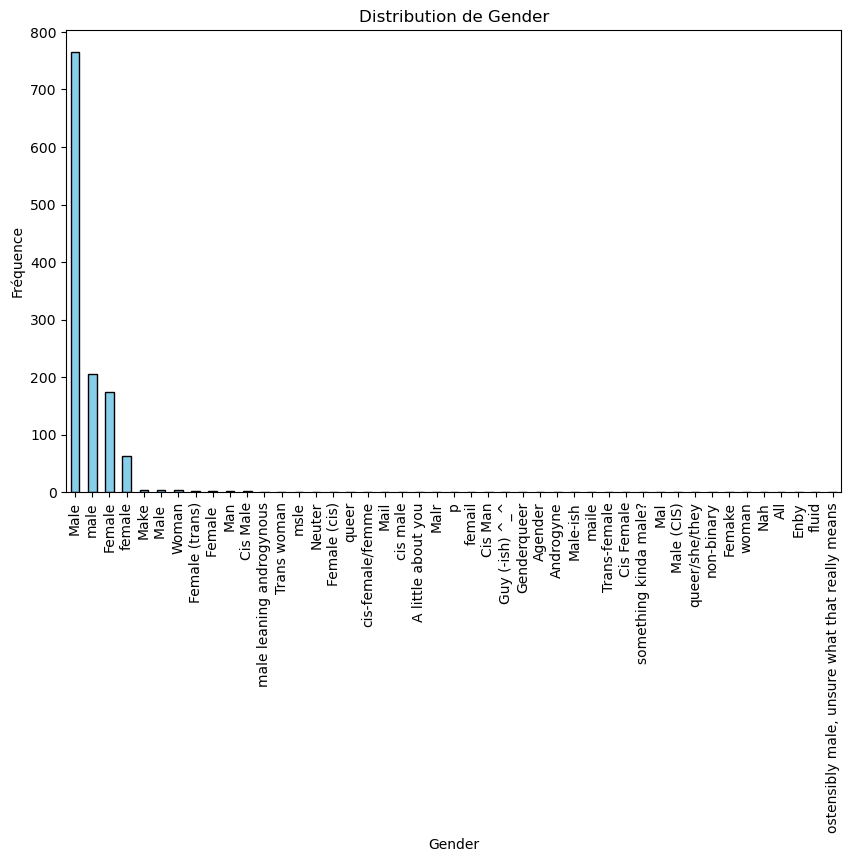

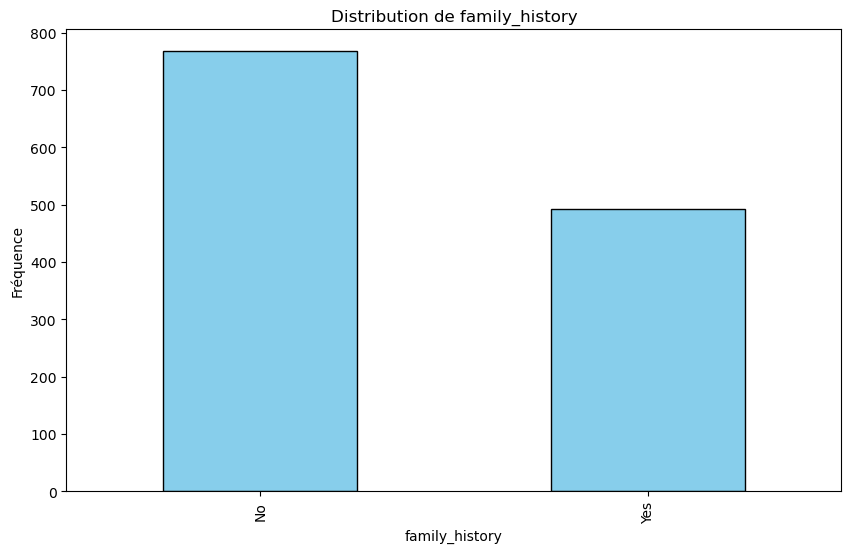

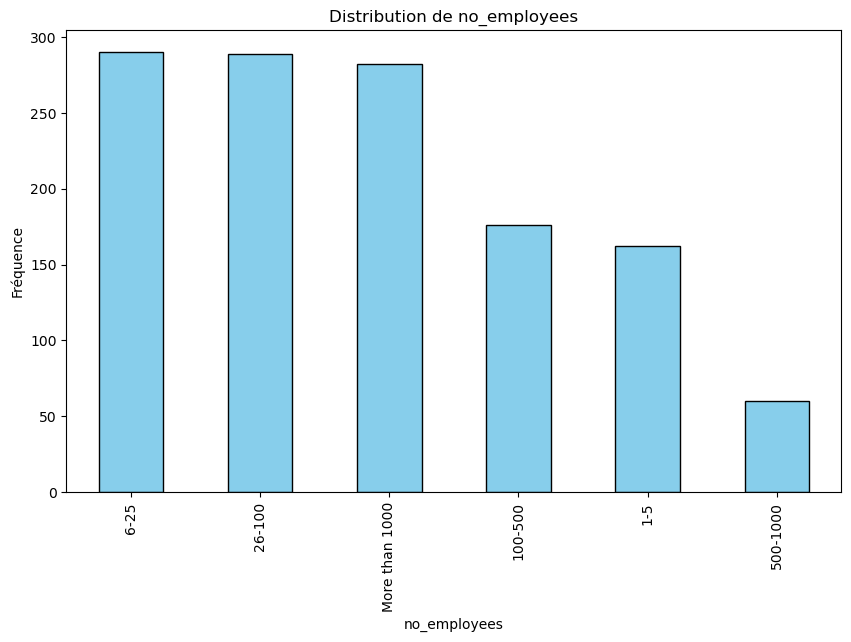

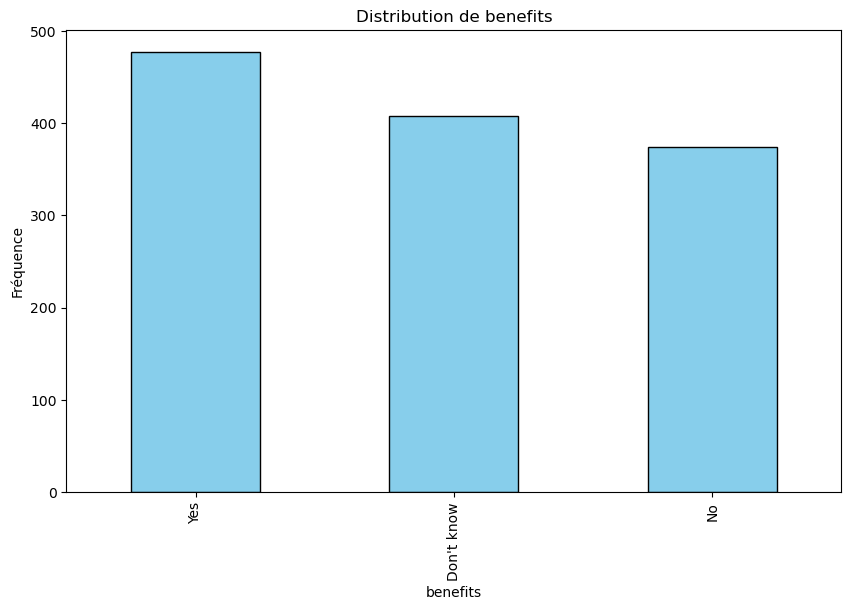

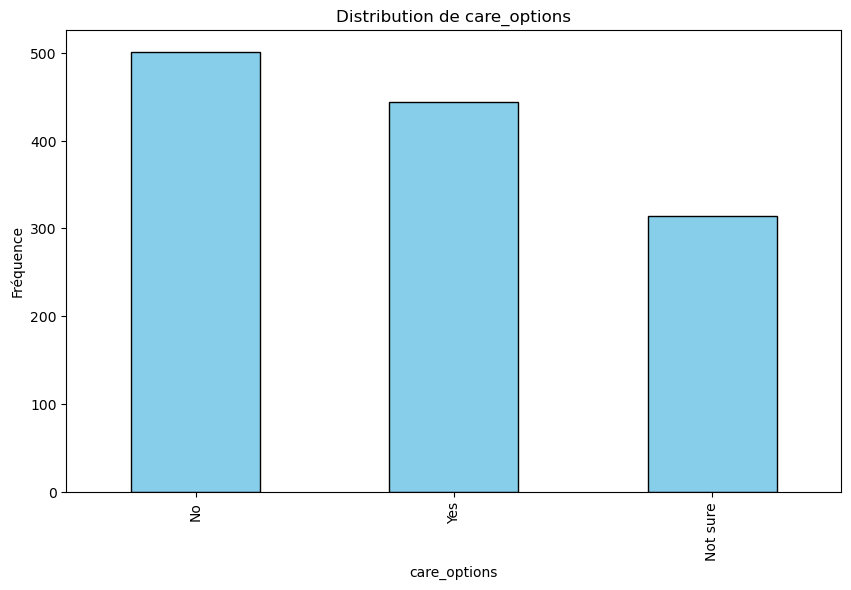

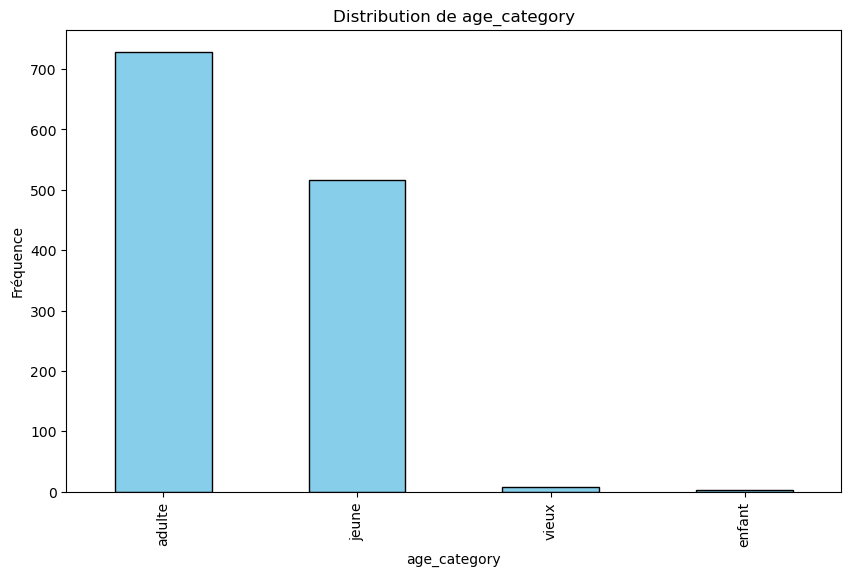

In [281]:
categorical_columns = ['Gender', 'family_history', 'no_employees', 'benefits', 'care_options', 'age_category']
for column in categorical_columns:
    plt.figure(figsize=(10,6))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de {column}')
    plt.show()

In [282]:
df = pd.get_dummies(df)

In [283]:
df.head()

,Gender_A little about you,Gender_Agender,Gender_All,Gender_Androgyne,Gender_Cis Female,Gender_Cis Male,Gender_Cis Man,Gender_Enby,Gender_Femake,Gender_Female,...,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,age_category_enfant,age_category_jeune,age_category_adulte,age_category_vieux
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False


In [284]:
df.shape

(1259, 154)

In [285]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [286]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)

In [287]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(mental_health_interview_No),0.138205,0.800635,0.127085,0.919540,1.148513,0.016433,2.477817,0.150046
1,(Gender_Female),(obs_consequence_No),0.138205,0.853852,0.111199,0.804598,0.942315,-0.006807,0.747933,-0.066322
2,(Gender_Male),(tech_company_Yes),0.607625,0.818904,0.504369,0.830065,1.013630,0.006782,1.065681,0.034270
3,(Gender_Male),(obs_consequence_No),0.607625,0.853852,0.534551,0.879739,1.030317,0.015729,1.215250,0.074992
4,(Gender_male),(tech_company_Yes),0.163622,0.818904,0.136616,0.834951,1.019596,0.002626,1.097229,0.022980


In [288]:
rules['lift'].max()

2.8379456235261484

In [289]:
rules['lift'].min()

0.9369302325581396

In [290]:
rules['support'].max()

0.7077045274027005

In [291]:
rules['support'].min()

0.10007942811755362

In [292]:
rules['confidence'].max()

1.0

In [293]:
rules['confidence'].min()

0.8

In [294]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)

print('la meilleure rule par confidence est : ')
print(rules_sorted.iloc[0])

la meilleure rule par confidence est : 
antecedents           (coworkers_Some of them, age_category_adulte, ...
consequents                                (mental_health_interview_No)
antecedent support                                             0.152502
consequent support                                             0.800635
support                                                        0.152502
confidence                                                          1.0
lift                                                           1.249008
leverage                                                       0.030403
conviction                                                          inf
zhangs_metric                                                  0.235239
Name: 9106, dtype: object


In [295]:
rules_sorted = rules.sort_values(by='support', ascending=False)

print('la meilleure rule par support est : ')
print(rules_sorted.iloc[0])

la meilleure rule par support est : 
antecedents             (tech_company_Yes)
consequents           (obs_consequence_No)
antecedent support                0.818904
consequent support                0.853852
support                           0.707705
confidence                         0.86421
lift                               1.01213
leverage                          0.008482
conviction                        1.076274
zhangs_metric                     0.066178
Name: 64, dtype: object


In [296]:
rules_sorted = rules.sort_values(by='lift', ascending=False)

print('la meilleure rule par lift est : ')
print(rules_sorted.iloc[0])

la meilleure rule par lift est : 
antecedents           (obs_consequence_No, coworkers_Yes, phys_healt...
consequents              (mental_health_consequence_No, supervisor_Yes)
antecedent support                                             0.128674
consequent support                                             0.282764
support                                                        0.103257
confidence                                                     0.802469
lift                                                           2.837946
leverage                                                       0.066872
conviction                                                     3.631007
zhangs_metric                                                  0.743272
Name: 26068, dtype: object
